In [32]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.neural_network import MLPClassifier
from imblearn.over_sampling import SMOTE
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, recall_score, f1_score, roc_auc_score, precision_score

import warnings
warnings.filterwarnings ('ignore')
plt.style.use('fivethirtyeight')


In [33]:
data = pd.read_csv(r'C:\Users\ELKHOLEI\Desktop\Project of ML\diabetes_Prediction\diabetes.csv')

In [34]:
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [35]:
data.info()
data.columns

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [36]:
data.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [37]:
data.duplicated().sum()

0

In [38]:
data.corr()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,1.000000,0.129459,0.141282,-0.081672,-0.073535,0.017683,-0.033523,0.544341,0.221898
Glucose,0.129459,1.000000,0.152590,0.057328,0.331357,0.221071,0.137337,0.263514,0.466581
BloodPressure,0.141282,0.152590,1.000000,0.207371,0.088933,0.281805,0.041265,0.239528,0.065068
SkinThickness,-0.081672,0.057328,0.207371,1.000000,0.436783,0.392573,0.183928,-0.113970,0.074752
Insulin,-0.073535,0.331357,0.088933,0.436783,1.000000,0.197859,0.185071,-0.042163,0.130548
BMI,0.017683,0.221071,0.281805,0.392573,0.197859,1.000000,0.140647,0.036242,0.292695
DiabetesPedigreeFunction,-0.033523,0.137337,0.041265,0.183928,0.185071,0.140647,1.000000,0.033561,0.173844
Age,0.544341,0.263514,0.239528,-0.113970,-0.042163,0.036242,0.033561,1.000000,0.238356
Outcome,0.221898,0.466581,0.065068,0.074752,0.130548,0.292695,0.173844,0.238356,1.000000


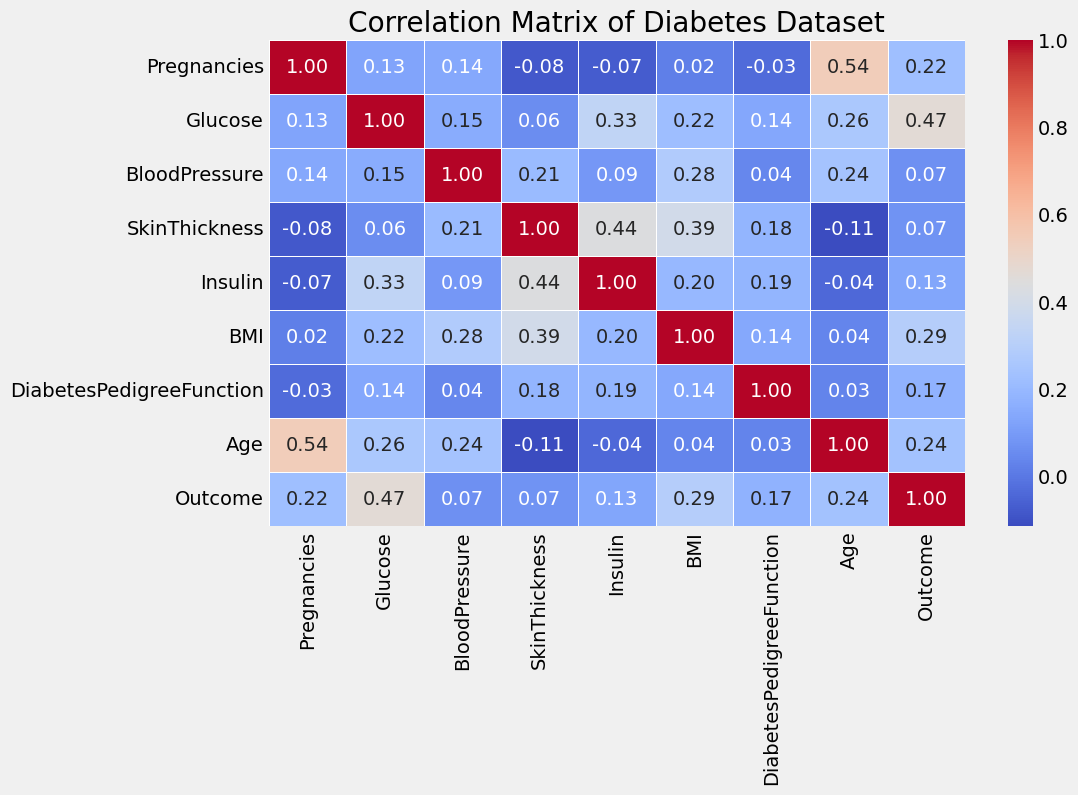

In [39]:
plt.figure(figsize=(10,6))
sns.heatmap(data.corr(), annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title("Correlation Matrix of Diabetes Dataset")
plt.show()

<Axes: xlabel='Outcome', ylabel='count'>

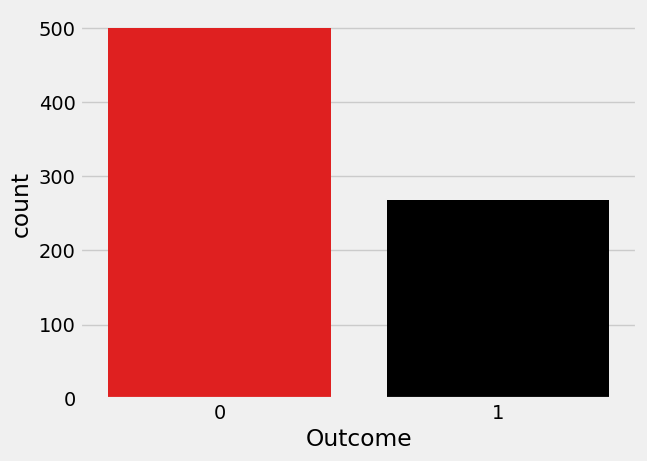

In [40]:
sns.countplot(x = 'Outcome' ,data = data ,  palette = ['red','black'] )

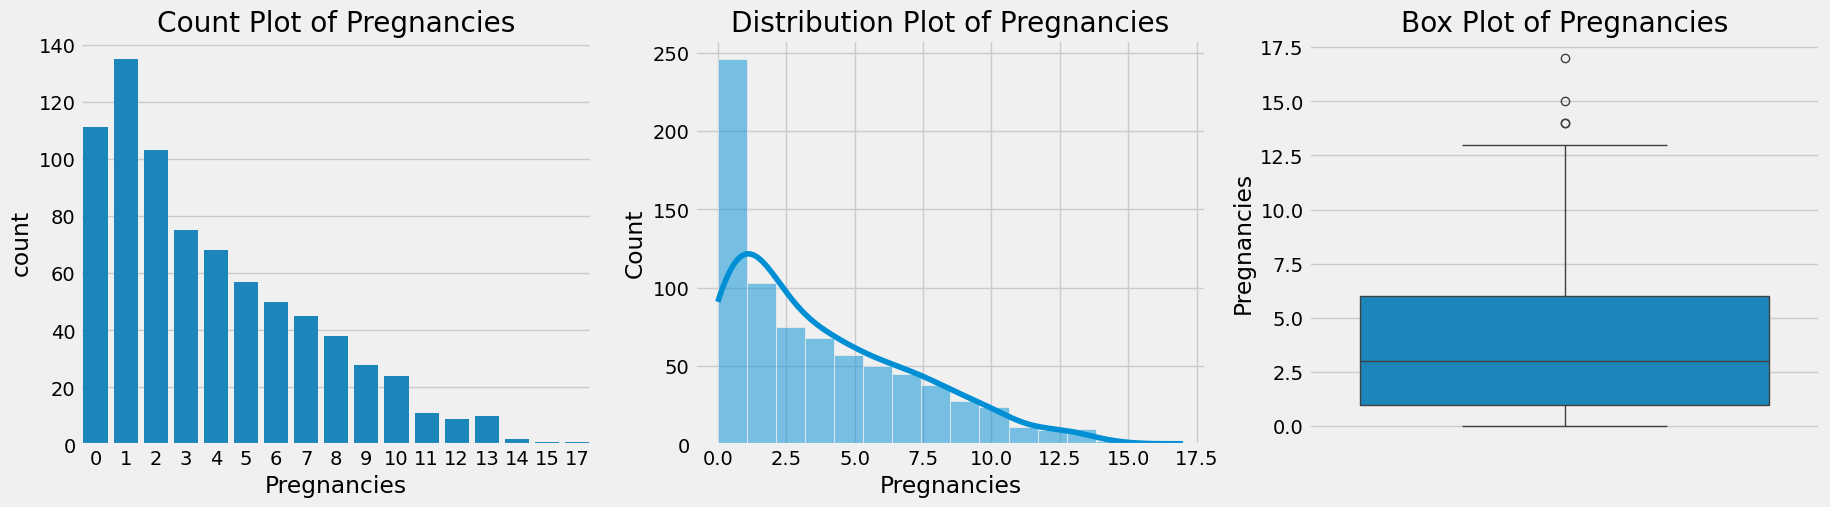

In [41]:
# إنشاء الشكل بمقاس 20x5 وإنشاء 3 محاور فرعية
fig, axes = plt.subplots(1, 3, figsize=(20, 5))

# 🔹 1️⃣ رسم مخطط العد (Countplot)
sns.countplot(x='Pregnancies', data=data, ax=axes[0])
axes[0].set_title("Count Plot of Pregnancies")

# 🔹 2️⃣ رسم التوزيع (Histogram + KDE)
sns.histplot(data['Pregnancies'], kde=True, ax=axes[1])
axes[1].set_title("Distribution Plot of Pregnancies")

# 🔹 3️⃣ رسم الصندوق (Boxplot)
sns.boxplot(y=data['Pregnancies'], ax=axes[2])
axes[2].set_title("Box Plot of Pregnancies")

# إظهار الرسومات
plt.show()

In [42]:
x = data.drop('Outcome', axis =1)
y = data ['Outcome']


In [43]:
# استيراد RandomOverSampler
from imblearn.over_sampling import RandomOverSampler

# إنشاء كائن oversampling وإعادة موازنة البيانات
rm = RandomOverSampler(random_state=41)
x_res, y_res = rm.fit_resample(x, y)

# استيراد Counter لحساب عدد القيم قبل وبعد التوازن
from collections import Counter

# طباعة حجم البيانات قبل وبعد التوازن
print("Old data set shape:", Counter(y))
print("New data set shape:", Counter(y_res))


Old data set shape: Counter({0: 500, 1: 268})
New data set shape: Counter({1: 500, 0: 500})


In [44]:
x_train , x_test , y_train , y_test = train_test_split(x_res,y_res,random_state = 42,test_size = 0.2)

In [45]:
y_train , x_train

(29     0
 535    1
 695    1
 557    0
 836    1
       ..
 106    0
 270    1
 860    1
 435    1
 102    0
 Name: Outcome, Length: 800, dtype: int64,
      Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
 29             5      117             92              0        0  34.1   
 535            4      132              0              0        0  32.9   
 695            7      142             90             24      480  30.4   
 557            8      110             76              0        0  27.8   
 836            1      113             64             35        0  33.6   
 ..           ...      ...            ...            ...      ...   ...   
 106            1       96            122              0        0  22.4   
 270           10      101             86             37        0  45.6   
 860            5      168             64              0        0  32.9   
 435            0      141              0              0        0  42.4   
 102            0     

In [46]:
model_1 = LogisticRegression()
model_1 = LogisticRegression(
    penalty='l2',      # استخدام L2 regularization (Ridge Regression) لتجنب overfitting
    C=1.0,             # القيمة الافتراضية، يمكنك تقليلها إذا كان النموذج يعاني من overfitting
    solver='liblinear',    # مناسب للبيانات المتوسطة إلى الكبيرة
    max_iter=500       # زيادة عدد التكرارات لضمان التقارب عند التدريب
)
model_1.fit(x_train, y_train)

LogisticRegression(max_iter=500, solver='liblinear')

LogisticRegression(max_iter=500, solver='liblinear')
accuracy is: 0.72 
recall is: 0.7029702970297029 
f1 score is: 0.7171717171717171


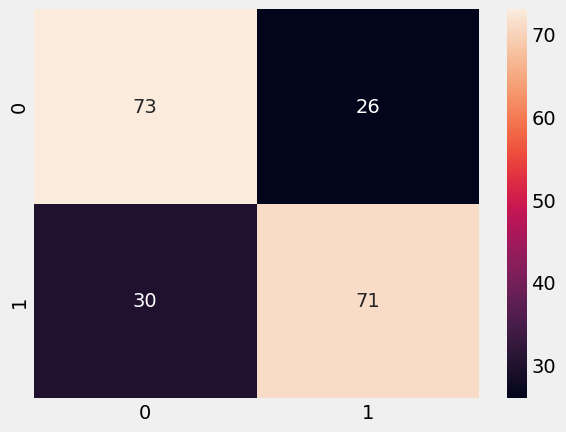

In [47]:
def cal(model_1):
    model_1.fit(x_train, y_train)  # تدريب النموذج
    pre = model_1.predict(x_test)  # التنبؤ بالقيم الجديدة

    accuracy = accuracy_score(y_test, pre)  # حساب الدقة
    recall = recall_score(y_test, pre)  # حساب الاستدعاء
    f1 = f1_score(y_test, pre)  # حساب F1-score

    sns.heatmap(confusion_matrix(y_test, pre), annot=True)  # مصفوفة الارتباك

    print(model_1)
    print("accuracy is:", accuracy, '\nrecall is:', recall, '\nf1 score is:', f1)

cal(model_1)

LogisticRegression(max_iter=500, solver='liblinear')
accuracy is: 0.72 
recall is: 0.7029702970297029 
f1 score is: 0.7171717171717171


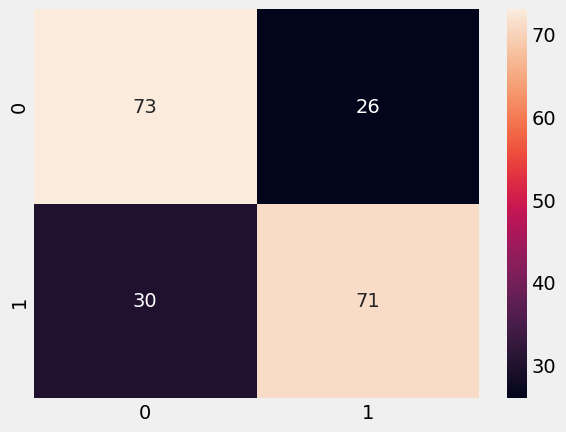

In [48]:
from sklearn.metrics import precision_score, roc_curve, auc

def cal_(model_1):
    model_1.fit(x_train, y_train)  # تدريب النموذج
    pre = model_1.predict(x_test)  # التنبؤ بالقيم الجديدة

    accuracy = accuracy_score(y_test, pre)  
    recall = recall_score(y_test, pre)  
    precision = precision_score(y_test, pre)  
    f1 = f1_score(y_test, pre)  

    # مصفوفة الارتباك
    plt.figure(figsize=(5, 4))
    sns.heatmap(confusion_matrix(y_test, pre), annot=True, fmt='d', cmap="Blues")
    plt.title("Confusion Matrix")
    plt.show()

    # رسم منحنى ROC
    fpr, tpr, _ = roc_curve(y_test, model_1.predict_proba(x_test)[:, 1])
    roc_auc = auc(fpr, tpr)

    plt.figure(figsize=(6, 5))
    plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
    plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curve')
    plt.legend(loc="lower right")
    plt.show()

    print(model_1)
    print(f"Accuracy: {accuracy:.2f}")
    print(f"Precision: {precision:.2f}")
    print(f"Recall: {recall:.2f}")
    print(f"F1 Score: {f1:.2f}")

# تجربة الدالة
cal(model_1)


In [49]:
model_2 = SVC(kernel='rbf', C=1.0, gamma='scale', probability=True)
model_3 = RandomForestClassifier(n_estimators=200, max_depth=10, random_state=42, class_weight='balanced', min_samples_split=5)

model_4 = GradientBoostingClassifier(n_estimators=1000)


RandomForestClassifier(class_weight='balanced', max_depth=10,
                       min_samples_split=5, n_estimators=200, random_state=42)
accuracy is: 0.84 
recall is: 0.8910891089108911 
f1 score is: 0.8490566037735849


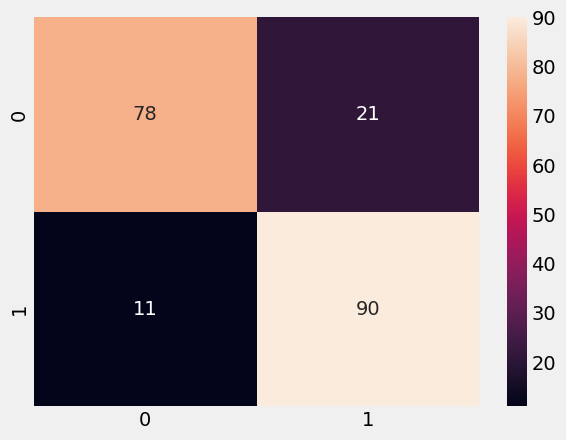

In [50]:
cal(model_3)

In [51]:
models = ['LogisticRegression','SVC',
           'RandomForestClassifier','GradientBoostingClassifier']
result_1 = []
result_2 = []
result_3 = []

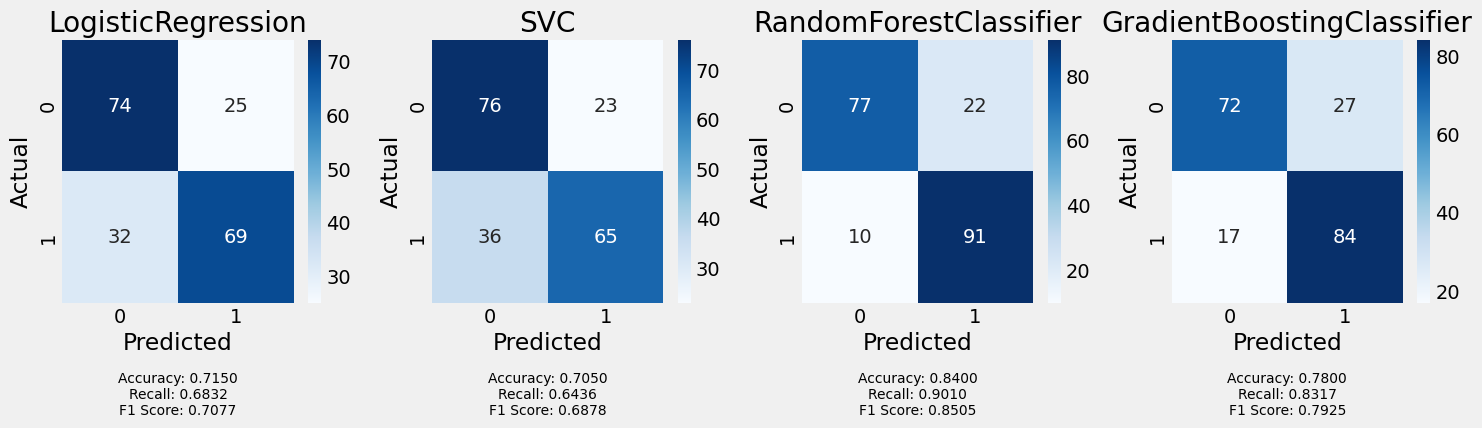

In [52]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import accuracy_score, recall_score, f1_score, confusion_matrix

# قوائم تخزين النتائج
models = [
    (LogisticRegression(), "LogisticRegression"),
    (SVC(), "SVC"),
    (RandomForestClassifier(), "RandomForestClassifier"),
    (GradientBoostingClassifier(), "GradientBoostingClassifier")
]

# إنشاء مخطط يحتوي على عدد الأعمدة = عدد النماذج
fig, axes = plt.subplots(1, len(models), figsize=(15, 5))

# التدريب والرسم لكل نموذج
for i, (model, name) in enumerate(models):
    model.fit(x_train, y_train)
    pre = model.predict(x_test)

    # حساب القيم
    accuracy = accuracy_score(y_test, pre)
    recall = recall_score(y_test, pre)
    f1 = f1_score(y_test, pre)

    # رسم مصفوفة الارتباك
    sns.heatmap(confusion_matrix(y_test, pre), annot=True, fmt='d', cmap="Blues", ax=axes[i])
    axes[i].set_title(f"{name}")
    axes[i].set_xlabel("Predicted")
    axes[i].set_ylabel("Actual")

    # إضافة النصوص أسفل كل heatmap
    axes[i].text(0.5, -0.35, f"Accuracy: {accuracy:.4f}\nRecall: {recall:.4f}\nF1 Score: {f1:.4f}", 
                 fontsize=10, ha='center', va='center', transform=axes[i].transAxes)

# ضبط التخطيط
plt.tight_layout()
plt.show()


In [53]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier

# تعريف شبكة البحث عن أفضل المعلمات
param_grid = {
    'n_estimators': [100, 200, 500],  # عدد الأشجار في الغابة
    'max_depth': [None, 10, 20],  # أقصى عمق للشجرة
    'min_samples_split': [2, 5, 10]  # الحد الأدنى لعدد العينات لتقسيم العقدة
}

# تطبيق البحث
grid_search = GridSearchCV(RandomForestClassifier(), param_grid, cv=5, scoring='accuracy', n_jobs=-1)
grid_search.fit(x_train, y_train)

# أفضل معلمات وجدها البحث
print("أفضل المعلمات:", grid_search.best_params_)
best_model = grid_search.best_estimator_


أفضل المعلمات: {'max_depth': None, 'min_samples_split': 2, 'n_estimators': 200}


In [54]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

# تعريف شبكة البحث عن أفضل المعلمات
param_grid = {
    'n_estimators': [100, 200, 300],  # عدد الأشجار
    'max_depth': [10, 20, 30],  # أقصى عمق للشجرة
    'min_samples_split': [2, 5, 10]  # الحد الأدنى لتقسيم العقدة
}

# إنشاء النموذج
rf_model = RandomForestClassifier(random_state=42)

# استخدام GridSearchCV للبحث عن أفضل المعلمات
grid_search = GridSearchCV(estimator=rf_model, param_grid=param_grid, 
                           cv=5, scoring='accuracy', n_jobs=-1, verbose=2)

# تدريب النموذج
grid_search.fit(x_train, y_train)

# طباعة أفضل المعلمات
print("أفضل المعلمات:", grid_search.best_params_)

# حفظ أفضل نموذج
best_rf_model = grid_search.best_estimator_

# تقييم النموذج على مجموعة الاختبار
y_pred = best_rf_model.predict(x_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy بعد ضبط المعلمات: {accuracy:.4f}")


Fitting 5 folds for each of 27 candidates, totalling 135 fits
أفضل المعلمات: {'max_depth': 20, 'min_samples_split': 2, 'n_estimators': 300}
Accuracy بعد ضبط المعلمات: 0.8300


In [55]:
from sklearn.model_selection import RandomizedSearchCV
import numpy as np

# تعريف شبكة البحث العشوائي
param_dist = {
    'n_estimators': np.arange(100, 500, 100),  # من 100 إلى 500 شجرة بخطوة 100
    'max_depth': np.arange(10, 50, 10),  # من 10 إلى 50 بخطوة 10
    'min_samples_split': [2, 5, 10, 20]  # خيارات تقسيم العقدة
}

# تطبيق RandomizedSearchCV
random_search = RandomizedSearchCV(estimator=rf_model, param_distributions=param_dist,
                                   n_iter=10, cv=5, scoring='accuracy', n_jobs=-1, verbose=2, random_state=42)

random_search.fit(x_train, y_train)

# طباعة أفضل المعلمات
print("أفضل المعلمات:", random_search.best_params_)

# تقييم النموذج
best_random_rf_model = random_search.best_estimator_
y_pred_random = best_random_rf_model.predict(x_test)
accuracy_random = accuracy_score(y_test, y_pred_random)
print(f"Accuracy بعد RandomizedSearchCV: {accuracy_random:.4f}")


Fitting 5 folds for each of 10 candidates, totalling 50 fits
أفضل المعلمات: {'n_estimators': 100, 'min_samples_split': 2, 'max_depth': 20}
Accuracy بعد RandomizedSearchCV: 0.8350


In [56]:
import pickle 

filename = 'diabetes_prediction.sav'

# التأكد من أن models تحتوي على 3 نماذج على الأقل قبل الحفظ
if len(models) > 2:
    pickle.dump(models[2][0], open(filename, 'wb'))  # models[2][0] للحصول على النموذج فقط
    print(f"✅ تم حفظ النموذج: {models[2][1]} بنجاح في {filename}")
else:
    print("⚠️ خطأ: قائمة models لا تحتوي على 3 نماذج على الأقل!")


✅ تم حفظ النموذج: RandomForestClassifier بنجاح في diabetes_prediction.sav


In [57]:
data[data["Outcome"] == 0 ]

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
1,1,85,66,29,0,26.6,0.351,31,0
3,1,89,66,23,94,28.1,0.167,21,0
5,5,116,74,0,0,25.6,0.201,30,0
7,10,115,0,0,0,35.3,0.134,29,0
10,4,110,92,0,0,37.6,0.191,30,0
...,...,...,...,...,...,...,...,...,...
762,9,89,62,0,0,22.5,0.142,33,0
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
